In [1]:
import pandas as pd
import urllib.request, json 
import time

API_key = 'ZJOZCVCA9DRZ9BL'

currencies = ['USD', 'EUR', 'GBP']
headers = ['open','high','low','close']

for i in range(0,len(currencies)):
    for j in range(1,len(currencies)):
        if(currencies[i] == currencies[j]):
            break
        print(currencies[i])
        print(currencies[j])
        url = "https://www.alphavantage.co/query?function=FX_DAILY&from_symbol={currency1}&to_symbol={currency2}&outputsize=full&apikey={key}"
        url = url.format(currency1 = currencies[i], currency2 = currencies[j],  key = API_key)
        
        # symb_name = "{symbol}.csv"
        # symb_name = symb_name.format(symbol = row['Symbol'])
        
        with urllib.request.urlopen(url) as news:
            data = json.loads(news.read().decode())
        data = data['Time Series FX (Daily)']
        data = pd.DataFrame(data)
        data = data.T
        data.columns = headers
        
        #data['date'] = data.index
        #print(data)
        #data.to_csv(symb_name)
        time.sleep(10)
print(data)

USD
EUR
USD
GBP
GBP
EUR
               open     high      low    close
2021-04-19  1.15435  1.16414  1.15300  1.16171
2021-04-16  1.15150  1.15528  1.14650  1.15380
2021-04-15  1.14973  1.15327  1.14930  1.15150
2021-04-14  1.15066  1.15344  1.14920  1.14978
2021-04-13  1.15314  1.15729  1.14780  1.15076
...             ...      ...      ...      ...
2002-02-22  1.63920  1.64090  1.62880  1.63510
2002-02-21  1.64010  1.64200  1.63360  1.63900
2002-02-20  1.63350  1.64070  1.62930  1.64030
2002-02-19  1.64010  1.64220  1.62880  1.63360
2002-02-18  1.63880  1.64240  1.63770  1.63990

[5000 rows x 4 columns]


In [3]:
labels = data.shift(-1)
X = (data.values)[::-1]
Y = (labels.values)[::-1]
X_tr = X[:3000,0]
Y_tr = Y[:3000,0]
X_val = X[3000:4000,0]
Y_val = Y[3000:4000,0]
X_tst = X[4000:,0]
Y_tst = Y[4000:,0]
print(X_tr.shape[0])
print(X_val.size)
print(X_tst.size)

3000
1000
1000


In [4]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X_tr = X_tr.reshape((X_tr.shape[0],1,1))
X_val = X_val.reshape((X_val.shape[0],1,1))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_tr, Y_tr, epochs=200, verbose=0,validation_data=(X_val, Y_val))
# demonstrate prediction

yhat = model.predict(X_tr, verbose=0)
print(yhat)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [60]:
print(yhat.shape)

(3000, 1)


IndexError: too many indices for array

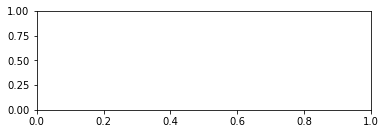

In [15]:
from matplotlib import pyplot
# load dataset
values = X_tr
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, 0])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()